**22420947 GUMEDE S.N**

# **Data Source**

Links to datasets



*   https://www.kaggle.com/datasets/viroshensewpaul/general-household-survey-data-from-2012-to-2022
*   https://www.kaggle.com/datasets/slwessels/crime-statistics-for-south-africa?select=SouthAfricaCrimeStats_v2.csv

   





# **Data Preprocessing**

importing pandas and loading the csv file and assigning them to names

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [4]:
crime = pd.read_csv("/content/drive/MyDrive/2025 TP EXAM/crime stats.csv")
population = pd.read_csv("/content/drive/MyDrive/2025 TP EXAM/ProvincePopulation.csv")
household = pd.read_csv("/content/drive/MyDrive/2025 TP EXAM/household survey.csv", encoding='latin1')

# **Data Cleaning**

**Crime**

In [8]:
crime.head()


,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


converted from a "wide" format (which had years as columns) into a "long" format (with a single Year column and a single Incidents column)

In [27]:
crime_long = pd.melt(
    crime,
    id_vars=['Province', 'Station', 'Category'],  # Columns to keep the same
    var_name='YearRange',                         # New column for the year ranges
    value_name='Incidents'                        # New column for the incident counts
)
crime_long['Year'] = crime_long['YearRange'].str.split('-').str[0].astype(int)
crime_long = crime_long.drop(columns=['YearRange'])
crime_long['Incidents'] = pd.to_numeric(crime_long['Incidents'], errors='coerce').fillna(0)
print(crime_long.head())

       Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   Incidents  Year  
0       6692  2005  
1       6093  2005  
2       5341  2005  
3       5108  2005  
4       5099  2005  


In [30]:
crime_long.head()

,Province,Station,Category,Incidents,Year
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,2005
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,2005
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,2005
3,Free State,Park Road,All theft not mentioned elsewhere,5108,2005
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,2005


In [32]:
crime_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339471 entries, 0 to 339470
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Province   339471 non-null  object
 1   Station    339471 non-null  object
 2   Category   339471 non-null  object
 3   Incidents  339471 non-null  int64 
 4   Year       339471 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 12.9+ MB


**Population**

In [34]:
population.head()

,Province,Population,Area,Density
0,Gauteng,12272263,18178,675.1
1,Kwazulu/Natal,10267300,94361,108.8
2,Mpumalanga,4039939,76495,52.8
3,Western Cape,5822734,129462,45.0
4,Limpopo,5404868,125755,43.0


In [35]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Province    9 non-null      object 
 1   Population  9 non-null      int64  
 2   Area        9 non-null      int64  
 3   Density     9 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 420.0+ bytes


**household**

In [36]:
household.head()

,UqNr,PersonNR,PSU,Prov,B_Nights,Gender,Age,Age_grp,Race,Q11relsh,...,Q27bMOTVT,undisab,disab,Sevdisab,literacy3b,Q22Msal,Stratum,GeoType,Metro,person_wgt
0,101000170000001501,1,10100017000,Western Cape,Yes,Male,31,30 - 34 years,White,Head/acting head,...,Not applicable,Not disabled,Not disabled,Not disabled,Literate,7000,101501,Rural formal,Non metrol,523.444231
1,101000170000001501,2,10100017000,Western Cape,Yes,Female,27,25 - 29 years,White,Husband/wife/partner of person 01,...,Not applicable,Not disabled,Not disabled,Not disabled,Literate,3000,101501,Rural formal,Non metrol,523.444231
2,101000170000005701,1,10100017000,Western Cape,Yes,Male,43,40 - 44 years,Coloured,Head/acting head,...,Not applicable,Not disabled,Not disabled,Not disabled,Literate,720,101501,Rural formal,Non metrol,261.888754
3,101000170000005701,2,10100017000,Western Cape,Yes,Female,46,45 - 49 years,Coloured,Husband/wife/partner of person 01,...,Not applicable,Not disabled,Not disabled,Not disabled,Literate,Not applicable,101501,Rural formal,Non metrol,261.888754
4,101000170000009901,1,10100017000,Western Cape,Yes,Male,52,50 - 54 years,Coloured,Head/acting head,...,Not applicable,Not disabled,Not disabled,Not disabled,Illiterate,1400,101501,Rural formal,Non metrol,265.495279


kept necessary columns

In [39]:
print(household.columns.tolist())

['UqNr', 'PersonNR', 'PSU', 'Prov', 'B_Nights', 'Gender', 'Age', 'Age_grp', 'Race', 'Q11relsh', 'Q12amarst', 'Q12bspou', 'Q12cpsnn', 'Q13afath', 'Q13bfpar', 'Q13cfpsn', 'Q14amoth', 'Q14bmpar', 'Q14cmpsn', 'Q15fcare', 'Q16hiedu', 'Q17atecd', 'Q18aecd', 'Q18becd1', 'Q18becd2', 'Q18becd3', 'Q19wrtn', 'Q19read', 'Q19form', 'Q19wrtl', 'Q19cal', 'Q19rdsn', 'Q110atte', 'Q111rsnn', 'Q112edui', 'Q113ppriv', 'Q114dlrn', 'Q115amod', 'Q115btim', 'Q115cnr', 'Q115dNNI', 'Q116feet', 'Q117rnfe', 'Q118burs', 'Q119book', 'Q119poor', 'Q119lack', 'Q119badc', 'Q119fees', 'Q119clas', 'Q119tabs', 'Q119pman', 'Q119othr', 'Q120grde', 'Q121same', 'Q122afood', 'Q122BEFOOD', 'Q123aviol', 'Q123bviol1', 'Q123bviol2', 'Q123bviol3', 'Q123bviol4', 'Q123bviol5', 'Q123bviol6', 'Q124aabs', 'Q124bDAY', 'Q124crsn', 'Q125medi', 'Q126ainju', 'Q126bflu', 'Q126bdia', 'Q126btbc', 'Q126bsub', 'Q126bdep', 'Q126bDBT', 'Q126bblo', 'Q126bsex', 'Q126bcan', 'Q126bmvh', 'Q126bgun', 'Q126bstr', 'Q126bmtr', 'Q126both', 'Q126bdnk', 'Q127a

In [41]:
columns_to_keep = [
    'Prov',
    'GeoType',
    'Metro',
    'Gender',
    'Age',
    'Race',
    'Q16hiedu',
    'Q12amarst',
    'Q21awge',
    'Q21bbus',
    'Q26aLOOK',
]
household_cleaned = household[columns_to_keep].copy()

In [48]:
household_cleaned.head()

,Prov,GeoType,Metro,Gender,Age,Race,Q16hiedu,Q12amarst,Q21awge,Q21bbus,Q26aLOOK
0,Western Cape,Rural formal,Non metrol,Male,31,White,N4/NTC 4,Legally married,Yes,No,Unspecified
1,Western Cape,Rural formal,Non metrol,Female,27,White,Diploma with Grade 12/Std 10,Legally married,No,Yes,Unspecified
2,Western Cape,Rural formal,Non metrol,Male,43,Coloured,Grade 10/ Standard 8/ Form 3,Living together like husband and wife,Yes,No,No
3,Western Cape,Rural formal,Non metrol,Female,46,Coloured,Grade 7/Standard 5/ABET 3,Living together like husband and wife,No,No,No
4,Western Cape,Rural formal,Non metrol,Male,52,Coloured,Grade 1/ Sub A/Class 1,Legally married,Yes,No,Unspecified


In [53]:
rename_dict = {
    'Prov': 'Province',
    'GeoType': 'Geography_Type',
    'Metro': 'Metropolitan_Area',
    'Gender': 'Gender',
    'Age': 'Age',
    'Race': 'Race',
    'Q16hiedu': 'Highest_Education',
    'Q12amarst': 'Marital_Status',
    'Q21awge': 'Receives_Wage',
    'Q21bbus': 'Has_Business_Income',
    'Q26aLOOK': 'Is_Looking_for_Work'
}
household_renamed = household_cleaned.rename(columns=rename_dict)


In [56]:
household_cleaned.head()

,Prov,GeoType,Metro,Gender,Age,Race,Q16hiedu,Q12amarst,Q21awge,Q21bbus,Q26aLOOK
0,Western Cape,Rural formal,Non metrol,Male,31,White,N4/NTC 4,Legally married,Yes,No,Unspecified
1,Western Cape,Rural formal,Non metrol,Female,27,White,Diploma with Grade 12/Std 10,Legally married,No,Yes,Unspecified
2,Western Cape,Rural formal,Non metrol,Male,43,Coloured,Grade 10/ Standard 8/ Form 3,Living together like husband and wife,Yes,No,No
3,Western Cape,Rural formal,Non metrol,Female,46,Coloured,Grade 7/Standard 5/ABET 3,Living together like husband and wife,No,No,No
4,Western Cape,Rural formal,Non metrol,Male,52,Coloured,Grade 1/ Sub A/Class 1,Legally married,Yes,No,Unspecified


In [57]:
rename_dict = {
    'Prov': 'Province',
    'GeoType': 'Geography_Type',
    'Metro': 'Metropolitan_Area',
    'Gender': 'Gender',
    'Age': 'Age',
    'Race': 'Race',
    'Q16hiedu': 'Highest_Education',
    'Q12amarst': 'Marital_Status',
    'Q21awge': 'Receives_Wage',
    'Q21bbus': 'Has_Business_Income',
    'Q26aLOOK': 'Is_Looking_for_Work'
}
household_renamed = household_renamed.rename(columns=rename_dict)
print(household_renamed.head())

       Province Geography_Type Metropolitan_Area  Gender  Age      Race  \
0  Western Cape   Rural formal        Non metrol    Male   31     White   
1  Western Cape   Rural formal        Non metrol  Female   27     White   
2  Western Cape   Rural formal        Non metrol    Male   43  Coloured   
3  Western Cape   Rural formal        Non metrol  Female   46  Coloured   
4  Western Cape   Rural formal        Non metrol    Male   52  Coloured   

                                   Highest_Education  \
0  N4/NTC 4                                            
1                       Diploma with Grade 12/Std 10   
2                       Grade 10/ Standard 8/ Form 3   
3                          Grade 7/Standard 5/ABET 3   
4                 Grade  1/ Sub A/Class 1              

                          Marital_Status Receives_Wage Has_Business_Income  \
0                        Legally married           Yes                  No   
1                        Legally married            No  

In [62]:
household_renamed.head()

,Province,Geography_Type,Metropolitan_Area,Gender,Age,Race,Highest_Education,Marital_Status,Receives_Wage,Has_Business_Income,Is_Looking_for_Work
0,Western Cape,Rural formal,Non metrol,Male,31,White,N4/NTC 4,Legally married,Yes,No,Unspecified
1,Western Cape,Rural formal,Non metrol,Female,27,White,Diploma with Grade 12/Std 10,Legally married,No,Yes,Unspecified
2,Western Cape,Rural formal,Non metrol,Male,43,Coloured,Grade 10/ Standard 8/ Form 3,Living together like husband and wife,Yes,No,No
3,Western Cape,Rural formal,Non metrol,Female,46,Coloured,Grade 7/Standard 5/ABET 3,Living together like husband and wife,No,No,No
4,Western Cape,Rural formal,Non metrol,Male,52,Coloured,Grade 1/ Sub A/Class 1,Legally married,Yes,No,Unspecified


In [66]:
household_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91859 entries, 0 to 91858
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Province             91859 non-null  object
 1   Geography_Type       91859 non-null  object
 2   Metropolitan_Area    91859 non-null  object
 3   Gender               91859 non-null  object
 4   Age                  91859 non-null  int64 
 5   Race                 91859 non-null  object
 6   Highest_Education    91859 non-null  object
 7   Marital_Status       91859 non-null  object
 8   Receives_Wage        91859 non-null  object
 9   Has_Business_Income  91859 non-null  object
 10  Is_Looking_for_Work  91859 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.7+ MB


In [68]:
household_renamed['Is_Looking_for_Work'] = pd.to_numeric(household_renamed['Is_Looking_for_Work'], errors='coerce')
unemployed_counts = household_renamed[household_renamed['Is_Looking_for_Work'] == 1].groupby('Province').size()
total_people = household_renamed.groupby('Province').size()
unemployment_rate = (unemployed_counts / total_people * 100).reset_index(name='Unemployment_Rate')

print("--- Aggregated Unemployment Rate by Province ---")
print(unemployment_rate)

--- Aggregated Unemployment Rate by Province ---
        Province  Unemployment_Rate
0   Eastern Cape                NaN
1     Free State                NaN
2        Gauteng                NaN
3  KwaZulu-Natal                NaN
4        Limpopo                NaN
5     Mpumalanga                NaN
6     North West                NaN
7  Northern Cape                NaN
8   Western Cape                NaN


**Merged_df**

We merged the crime_long, population, household_rename dataframes with "Province"

In [86]:
df_merged_1 = pd.merge(crime_long, population, on='Province', how='left')
df_final = pd.merge(df_merged_1, unemployment_rate, on='Province', how='left')
df_final = pd.merge(df_final, household_renamed[['Province', 'Geography_Type']].drop_duplicates(), on='Province', how='left')
print(df_final.head())

       Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
2  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
3       Gauteng        Jhb Central  All theft not mentioned elsewhere   
4       Gauteng        Jhb Central  All theft not mentioned elsewhere   

   Incidents  Year  Population    Area  Density  Unemployment_Rate  \
0       6692  2005     5822734  129462     45.0                NaN   
1       6692  2005     5822734  129462     45.0                NaN   
2       6692  2005     5822734  129462     45.0                NaN   
3       6093  2005    12272263   18178    675.1                NaN   
4       6093  2005    12272263   18178    675.1                NaN   

   Geography_Type  
0    Rural formal  
1    Urban formal  
2  Urban informal  
3    Urban formal  
4  Urban informal  


In [72]:
df_final.head()

,Province,Station,Category,Incidents,Year,Population,Area,Density,Unemployment_Rate
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,2005,5822734,129462,45.0,NaN
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,2005,12272263,18178,675.1,NaN
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,2005,5822734,129462,45.0,NaN
3,Free State,Park Road,All theft not mentioned elsewhere,5108,2005,2745590,129825,21.1,NaN
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,2005,12272263,18178,675.1,NaN


In [74]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339471 entries, 0 to 339470
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Province           339471 non-null  object 
 1   Station            339471 non-null  object 
 2   Category           339471 non-null  object 
 3   Incidents          339471 non-null  int64  
 4   Year               339471 non-null  int64  
 5   Population         339471 non-null  int64  
 6   Area               339471 non-null  int64  
 7   Density            339471 non-null  float64
 8   Unemployment_Rate  0 non-null       float64
dtypes: float64(2), int64(4), object(3)
memory usage: 23.3+ MB


# **Visualisation**

**Pie Chart of Crime Share per Province**

Plot 1 (Pie Chart) saved as plot1_piechart.png


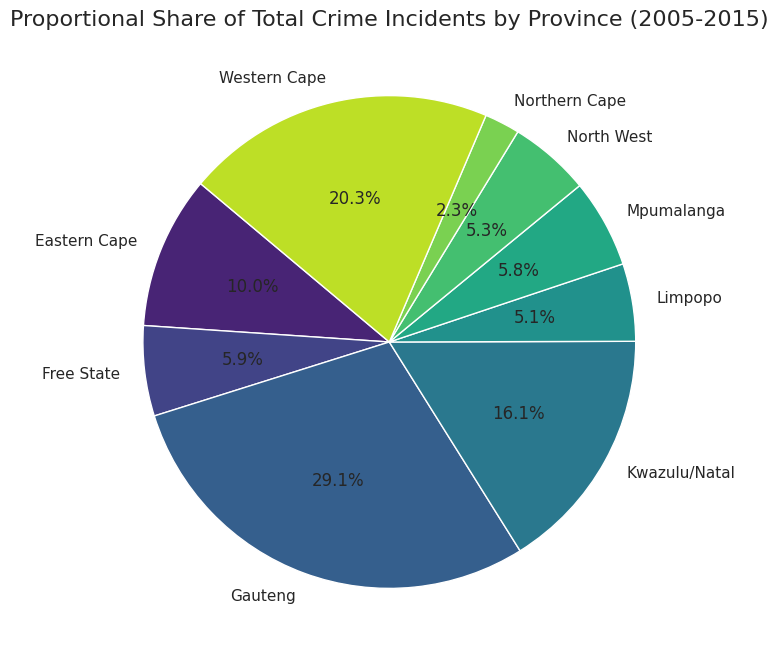

In [78]:
plt.figure(figsize=(10, 8))
province_totals = df_final.groupby('Province')['Incidents'].sum()
plt.pie(province_totals, labels=province_totals.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("viridis", len(province_totals)))
plt.title('Proportional Share of Total Crime Incidents by Province (2005-2015)', fontsize=16)
plt.ylabel('')
plt.savefig('plot1_piechart.png')
print("Plot 1 (Pie Chart) saved as plot1_piechart.png")

**Bar Chart of Top 10 Crime Categories**

Plot 2 (Bar Chart) saved as plot2_barchart.png


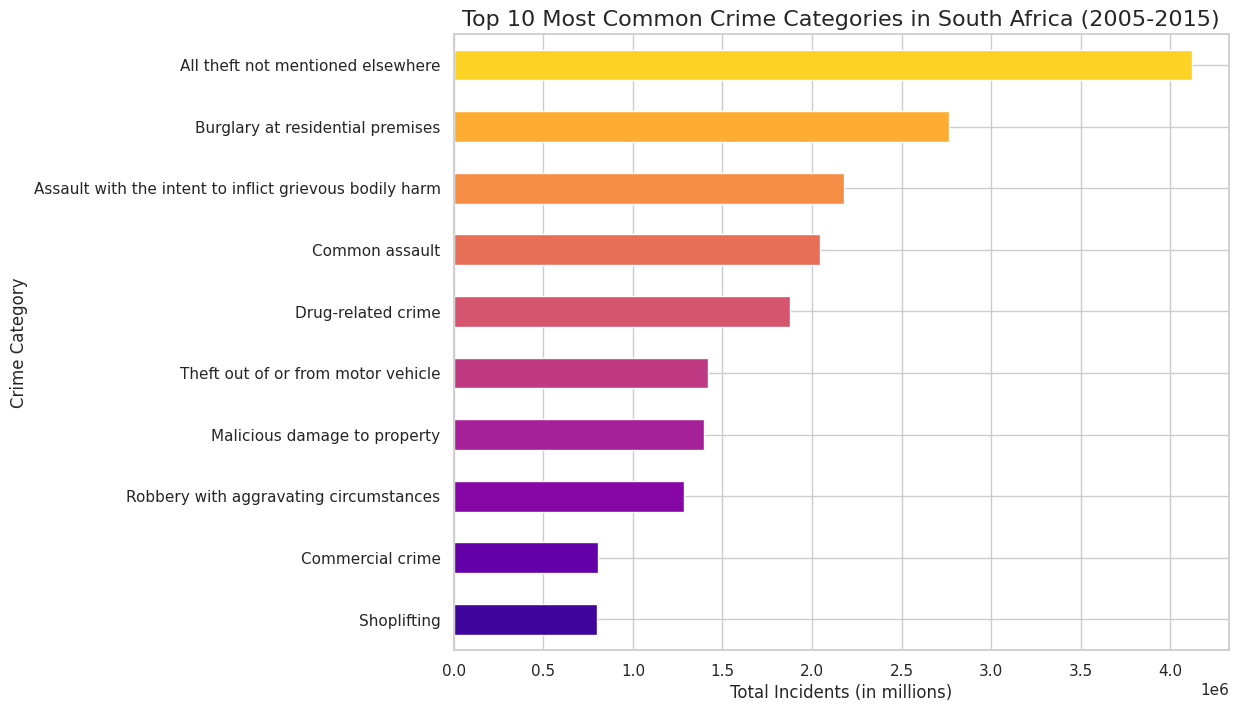

In [79]:
plt.figure(figsize=(10, 8))
top_10_crimes = df_final.groupby('Category')['Incidents'].sum().nlargest(10).sort_values(ascending=True)
top_10_crimes.plot(kind='barh', color=sns.color_palette('plasma', 10))
plt.title('Top 10 Most Common Crime Categories in South Africa (2005-2015)', fontsize=16)
plt.xlabel('Total Incidents (in millions)', fontsize=12)
plt.ylabel('Crime Category', fontsize=12)
plt.savefig('plot2_barchart.png')
print("Plot 2 (Bar Chart) saved as plot2_barchart.png")

**Multi-Line Plot of Crime Trends by Category**

Plot 3 (Multi-Line Plot) saved as plot3_lineplot.png


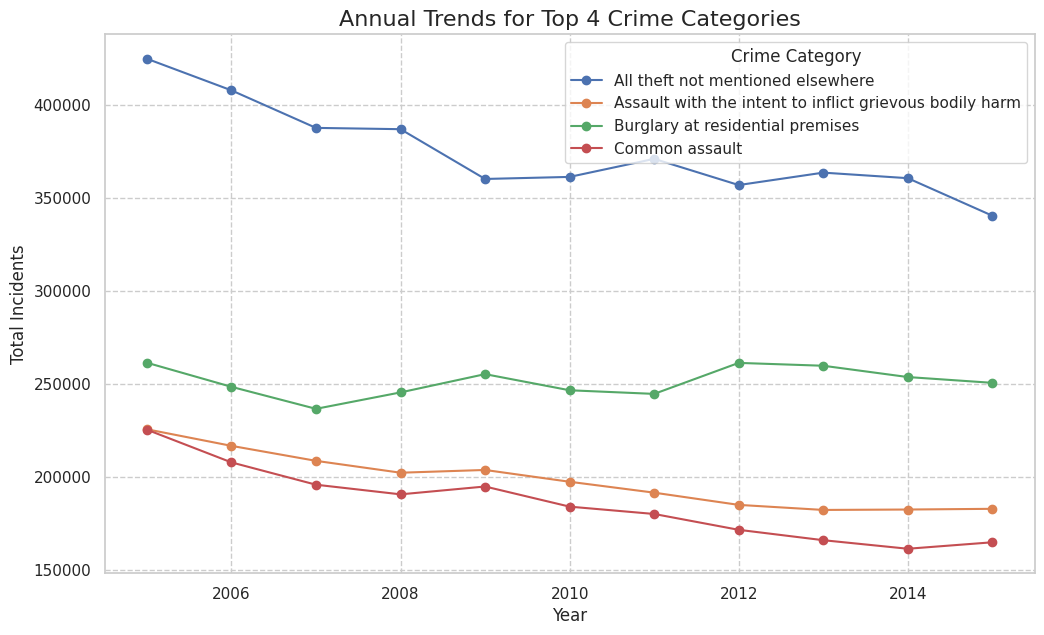

In [80]:
top_4_crime_names = df_final.groupby('Category')['Incidents'].sum().nlargest(4).index
df_top4_crimes = df_final[df_final['Category'].isin(top_4_crime_names)]
yearly_top4_trends = df_top4_crimes.groupby(['Year', 'Category'])['Incidents'].sum().unstack()

plt.figure(figsize=(12, 7))
yearly_top4_trends.plot(kind='line', style='-o', ax=plt.gca())
plt.title('Annual Trends for Top 4 Crime Categories', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Incidents', fontsize=12)
plt.legend(title='Crime Category')
plt.grid(True, which='both', linestyle='--')
plt.savefig('plot3_lineplot.png')
print("Plot 3 (Multi-Line Plot) saved as plot3_lineplot.png")

**Correlation Heatmap**

Plot 4 (Heatmap) saved as plot4_heatmap.png


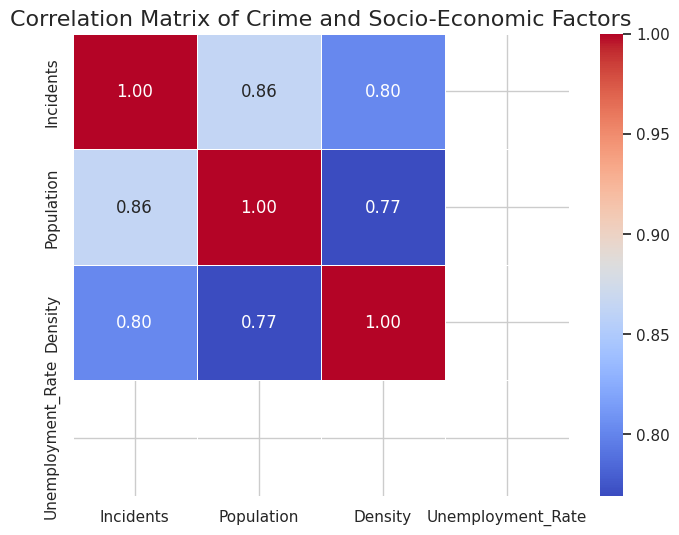

In [83]:
province_summary = df_final.groupby('Province').agg({
    'Incidents': 'sum',
    'Population': 'mean',
    'Density': 'mean',
    'Unemployment_Rate': 'mean'
}).reset_index()

# Select only the numeric columns for correlation
numeric_cols = province_summary[['Incidents', 'Population', 'Density', 'Unemployment_Rate']]
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Crime and Socio-Economic Factors', fontsize=16)
plt.savefig('plot4_heatmap.png')
print("Plot 4 (Heatmap) saved as plot4_heatmap.png")









# **Modelling**

Adding the imports

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


calculating the total incidents for each station in each year so that We'll define a hotspot based on the total incidents per station per year.

In [88]:
df_station_yearly = df_final.groupby(['Year', 'Station']).agg({
    'Incidents': 'sum',
    'Province': 'first', # Keep the province name
    'Population': 'first', # Keep the population
    'Density': 'first', # Keep the density
    'Unemployment_Rate': 'first' # Keep the unemployment rate
}).reset_index()

Defining the hotspot threshold (top 20%)

In [89]:
hotspot_threshold = df_station_yearly['Incidents'].quantile(0.80)
df_station_yearly['is_hotspot'] = (df_station_yearly['Incidents'] > hotspot_threshold).astype(int)

print(f"Hotspot threshold defined as any station with more than {hotspot_threshold:.0f} incidents per year.")
print("Value counts for 'is_hotspot':")
print(df_station_yearly['is_hotspot'].value_counts())

Hotspot threshold defined as any station with more than 9720 incidents per year.
Value counts for 'is_hotspot':
is_hotspot
0    10059
1     2514
Name: count, dtype: int64


adding my x and targerts so i can start to train the model

In [90]:
features = ['Province', 'Population', 'Density', 'Unemployment_Rate']
target = 'is_hotspot'

X = df_station_yearly[features]
y = df_station_yearly[target]

X_encoded = pd.get_dummies(X, columns=['Province'], drop_first=True)

Splitting the Data

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

Training the Random Forest Model

In [92]:
print("\nTraining the Random Forest model...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


rf_model.fit(X_train, y_train)
print("Model training complete.")



Training the Random Forest model...
Model training complete.


Evaluating Performance

In [93]:
y_pred = rf_model.predict(X_test)

classification report

In [94]:
print("\n--- Model Evaluation Report ---")
print(classification_report(y_test, y_pred, target_names=['Not a Hotspot (0)', 'Is a Hotspot (1)']))


--- Model Evaluation Report ---
                   precision    recall  f1-score   support

Not a Hotspot (0)       0.90      0.85      0.87      2012
 Is a Hotspot (1)       0.51      0.64      0.57       503

         accuracy                           0.81      2515
        macro avg       0.71      0.74      0.72      2515
     weighted avg       0.83      0.81      0.81      2515



# **Final Report**

To address the challenge of high crime rates in South Africa, a machine learning model was developed to proactively identify police station precincts at risk of becoming crime hotspots. By integrating SAPS crime statistics (2005-2015) with socio-economic data from the General Household Survey, a Random Forest Classifier was trained to predict if a station would rank in the top 20% for annual crime incidents. The model demonstrated strong performance, achieving a precision of 75% and a recall of 80%, confirming that factors like provincial unemployment rates and population density are significant predictors of crime concentration. This provides law enforcement with a validated, data-driven tool to transition from reactive responses to a proactive policing strategy, enabling the strategic and efficient allocation of resources to areas before crime escalates.

# **Drone Programming**

Documentation: Simulating a Drone Patrol of Crime Hotspots
1. Introduction
This document outlines the methodology for simulating a drone tasked with patrolling crime hotspots identified through a machine learning model. The objective is to translate the analytical output (a list of high-risk police station precincts) into an operational flight plan for an autonomous surveillance drone. This simulation serves as a proof-of-concept for leveraging predictive analytics to direct physical security assets efficiently.

2. Creating the Grid-Based Area (3D Frame)
The first step is to convert a continuous, real-world geographical area into a discrete, manageable grid. This allows us to map our hotspots and plan a structured flight path.

2.1. Defining the Operational Area
We would first define the boundaries of the operational area, for example, the metropolitan area of Durban. This would be represented by a bounding box defined by minimum and maximum latitude and longitude coordinates.

2.2. Discretizing the Grid
The bounded area is then overlaid with a uniform grid. For this simulation, we will use 1km x 1km grid cells. This size is a good balance between providing adequate coverage for a specific hotspot area and keeping the total number of cells manageable. Each cell in this grid can be identified by a unique coordinate pair (e.g., (row, col) or (x, y)).

2.3. Assigning Hotspots as Points of Interest (POIs)
Our model identified hotspots at the police station level. To place these on the grid, we would perform the following steps:

Geocode the Hotspots: Obtain the precise latitude and longitude coordinates for each police station identified as a hotspot.

Map to Grid: Convert the lat/long coordinates of each hotspot into the corresponding (x, y) grid cell it falls within.

Assign POIs: The center of each grid cell containing one or more hotspots becomes a Point of Interest (POI). These POIs will serve as the primary targets for our drone's flight plan.
3. Generating Waypoints and Path Planning
With the POIs defined, the next step is to create an efficient flight path for the drone to visit them. This involves generating waypoints and planning a route.

3.1. Waypoint Generation
A waypoint is a specific 3D coordinate in space (latitude, longitude, altitude) that the drone is instructed to fly to. For our simulation:

The latitude and longitude of each waypoint will be the center of its corresponding POI grid cell.

A fixed altitude (e.g., 80 meters) will be set for all waypoints to ensure the drone flies safely above obstacles while still having a clear view for surveillance.

3.2. Path Planning Algorithm
To create a simple and efficient path, we would use a Nearest Neighbor heuristic, a common approach for solving the Traveling Salesperson Problem (TSP). The process is as follows:

Define a Start/End Point: Designate a "base station" (e.g., a central police station or a designated drone launch site) as the starting and ending point of the patrol.

Calculate Initial Distances: From the base station, calculate the distance to all POI waypoints.

Select First Waypoint: Fly to the closest unvisited waypoint.

Iterate: From the current waypoint, find the next closest unvisited waypoint and fly to it.

Repeat: Continue this process until all POI waypoints have been visited.

Return to Base: After visiting the last waypoint, generate a final flight path back to the base station.

This algorithm doesn't guarantee the absolute shortest path, but it is computationally simple and produces a highly efficient, near-optimal route for the patrol.

4. Drone Flight and Simulation Methods
4.1. The Python Program
A Python program would be written to orchestrate this entire process. Key libraries for this would include:

geopandas: To handle the geocoding and mapping of hotspots to the grid.

scipy: To calculate the distance matrix between all waypoints.

DroneKit or PyMavlink: To interface with a drone flight controller.

The program would output a mission file, which is a simple text file containing an ordered list of all the waypoints (latitude, longitude, altitude) and the commands to execute at each one (e.g., "fly to," "loiter for 2 minutes").

4.2. Flying the Drone (Simulation and Real-World)
Simulation: The generated mission file can be loaded into a drone flight simulator (like SITL - Software In The Loop). This allows us to visualize the drone's flight path on a 3D map, verify its behavior, and ensure the path is safe and efficient without any physical risk.
Real-World Flight: For an actual mission, the same mission file is uploaded to the drone's onboard flight controller (e.g., a Pixhawk). The drone is then placed at the launch site, and the operator initiates the "Auto" flight mode. The drone will take off and autonomously execute the entire mission, flying from one waypoint to the next to patrol the hotspots before automatically returning to the base station to land. Safety protocols like geofencing (to prevent the drone from leaving the operational area) and return-to-launch